# KNN Project 

We will focus on using a PipeLine and a GridSearchCV tool since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with, or detect objects on or under the surface of the water, such as other vessels.
 
<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known minefield (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine-learning model capable of detecting the difference between a rock and a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('sonar.all-data.csv')

In [6]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**The heatmap that shows the correlation between the difference frequency responses.**

<Axes: >

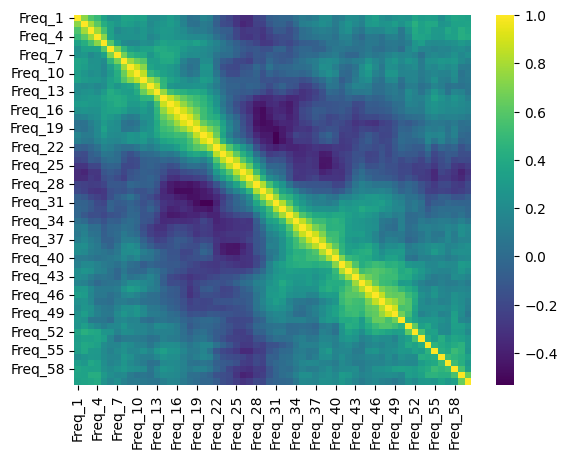

In [9]:
sns.heatmap(df.corr(numeric_only=True),cmap='viridis')

**The top 5 correlated frequencies with the target\label**

*We first map the label to 0s and 1s.*

*We're looking for **absolute** correlation values.*

In [13]:
map = {'R':0, 'M':1}

In [14]:
df['Target'] = df['Label'].map(map)

In [20]:
np.abs(df.corr(numeric_only=True)['Target']).sort_values()[-6:]

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [21]:
# OR:
np.abs(df.corr(numeric_only=True)['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**We will Split the data into features and labels, and then split it into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(['Target', 'Label'], axis=1)

In [25]:
y = df['Target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Pipeline

**Creating a PipeLine that contains both a StandardScaler and a KNN model**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
model = KNeighborsClassifier()

In [31]:
scaler = StandardScaler()

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
operations = [('scaler', scaler), ('model', model)]

In [34]:
pipe = Pipeline(operations)

### Grid Search with Pipeline

**We will Perform a grid search with the pipeline to test various values of k and report back the best-performing parameters.**

In [35]:
from sklearn.model_selection import GridSearchCV

In [45]:
k_values = range(1,10)

In [46]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [47]:
param_grid = {'model__n_neighbors': k_values}

In [48]:
cv_classifier = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [49]:
cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': range(1, 10)},
             scoring='accuracy')

In [50]:
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

### Plot


**Using the .cv_results_ dictionary, we create a plot of the mean test scores per K value.**

In [53]:
cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [54]:
cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 ])

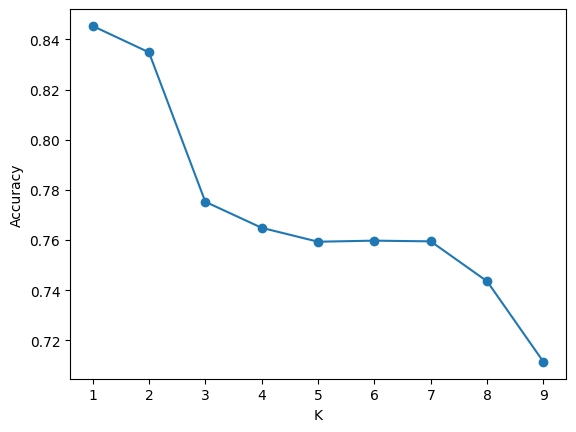

In [61]:
scores = cv_classifier.cv_results_['mean_test_score']

plt.plot(k_values, scores, '-o')

plt.xlabel('K')
plt.ylabel('Accuracy');

### Final Model Evaluation

**Using the grid classifier object from the previous step, we get a final performance classification report and confusion matrix.**

In [62]:
scaler = StandardScaler()

best_knn = KNeighborsClassifier(n_neighbors=1)

operations = [('scaler', scaler), ('best_knn', best_knn)]

In [63]:
pipe = Pipeline(operations)

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('best_knn', KNeighborsClassifier(n_neighbors=1))])

In [65]:
y_pred = pipe.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [72]:
confusion_matrix(y_test, y_pred)

array([[ 7,  1],
       [ 1, 12]])